In [1]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
import math
import os
from datetime import date, timedelta, datetime
import time
from tqdm import tqdm
# import pyodbc6
import seaborn as sns
from scipy import stats
import xlsxwriter
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
start_time = time.perf_counter()
from scipy.stats import zscore

In [52]:
# regime_dataframes = [
#     'Score_MomentumLong_rebalanceFrequency_2_topStocks_25_23-01-2025_17.26.45_nav.csv',
#     'Score_MomentumShort_rebalanceFrequency_2_topStocks_25_23-01-2025_18.05.23_nav.csv',
#     'Score_MomentumMedium_rebalanceFrequency_2_topStocks_25_23-01-2025_17.36.09_nav.csv',
#     'MoMMulti_rebalanceFrequency_2_topStocks_25_23-01-2025_17.49.19_nav.csv',
#     'NormalizedLowVolScore_rebalanceFrequency_2_topStocks_25_23-01-2025_17.15.34_nav.csv',
#     'Quality_Score_rebalanceFrequency_2_topStocks_25_23-01-2025_18.17.40_nav.csv',
#     'Theme_Mom_rebalanceFrequency_2_topStocks_25_23-01-2025_17.54.33_nav.csv',
#     'Value_score_Peer_rebalanceFrequency_2_topStocks_25_23-01-2025_18.39.33_nav.csv',
#     'Value_score_ABS_rebalanceFrequency_2_topStocks_25_23-01-2025_18.39.33_nav.csv'
# ]

# regimecleaned_dataframes = []

# # Load, clean, and store the dataframes
# for file in regime_dataframes:  # Corrected to iterate over regime_dataframes
#     df = pd.read_csv(file)
#     if 'Unnamed: 0' in df.columns:
#         df = df.drop(columns=['Unnamed: 0'])  # Drop Unnamed: 0 if it exists
#     regimecleaned_dataframes.append(df)

# # Start with the first DataFrame
# regime_df = [0]

# # Merge all DataFrames on Date and Symbol using an outer join
# for df in regimecleaned_dataframes[1:]:
#     regime_df = pd.merge(regime_df, df, on=['Date'], how='outer')

# # Ensure 'Date' column is in datetime format
# regime_df['Date'] = pd.to_datetime(regime_df['Date'])

# regime_df = regime_df.dropna()
# # Step 1: Convert 'Date' column to datetime
# regime_df['Date'] = pd.to_datetime(regime_df['Date'])
# from scipy.stats import zscore

# # Load the benchmark data
# df1 = pd.read_csv('Data1.csv')
# df1 = df1[['Date', 'Nifty 500 ']]
# df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
# df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
# df1['Date'] = pd.to_datetime(df1['Date'])

# merged_df = pd.merge(regime_df, df1, on='Date', how='inner')

# # Set 'Date' as the index for further calculations
# merged_df.set_index('Date', inplace=True)

In [53]:
# import os
# import glob

# # Define the folder path containing the CSV files
# folder_path = 'factor_nav_21_4_2025'  # Update the folder path if necessary

# # Get a list of all CSV files in the folder
# csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# # List to store individual cleaned DataFrames
# regimecleaned_dataframes = []

# # Load and clean each CSV file
# for file in csv_files:
#     df = pd.read_csv(file)
#     # Drop 'Unnamed: 0' column if it exists
#     if 'Unnamed: 0' in df.columns:
#         df = df.drop(columns=['Unnamed: 0'])
#     # Convert 'Date' column to datetime if present
#     if 'Date' in df.columns:
#         df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#     regimecleaned_dataframes.append(df)

# # Check if any DataFrame was loaded
# if not regimecleaned_dataframes:
#     raise ValueError("No CSV files found in the folder.")

# # Start with the first DataFrame
# regime_df = regimecleaned_dataframes[0]

# # Merge all DataFrames on the 'Date' column using an outer join
# for df in regimecleaned_dataframes[1:]:
#     regime_df = pd.merge(regime_df, df, on='Date', how='outer')

# # Ensure 'Date' is in datetime format
# regime_df['Date'] = pd.to_datetime(regime_df['Date'], errors='coerce')

# # Optionally, drop rows with missing values (if needed)
# # regime_df = regime_df.dropna()

# # Optionally, set 'Date' as the index
# regime_df.set_index('Date', inplace=True)

# # regime_df = regime_df.dropna()
# # Step 1: Convert 'Date' column to datetime
# # regime_df['Date'] = pd.to_datetime(regime_df['Date'])

# # Load the benchmark data
# df1 = pd.read_csv('Data1.csv')
# df1 = df1[['Date', 'Nifty 500 ']]
# df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
# df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
# df1['Date'] = pd.to_datetime(df1['Date'])

# merged_df = pd.merge(regime_df, df1, on='Date', how='inner')

# # Set 'Date' as the index for further calculations
# merged_df.set_index('Date', inplace=True)

In [2]:
import glob
import os

# Define the folder path containing the CSV files
folder_path = 'factor_nav_7_5_2025'

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Create an empty DataFrame to store the merged result
merged_df = None

# Process each CSV file
for file in csv_files:
    # Extract the factor/strategy name from the filename
    file_name = os.path.splitext(os.path.basename(file))[0]
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Drop 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    
    # Convert 'Date' column to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Get the name of the factor/strategy column (the column that's not 'Date')
    factor_col = [col for col in df.columns if col != 'Date'][0]
    
    # Create a simple DataFrame with just Date and the factor column
    simple_df = df[['Date', factor_col]]
    
    # If this is the first file, initialize the merged DataFrame
    if merged_df is None:
        merged_df = simple_df
    else:
        # Merge with the existing DataFrame
        merged_df = pd.merge(merged_df, simple_df, on='Date', how='outer')

# Now load the benchmark data
df1 = pd.read_excel('latest size data.xlsx')
df1 = df1[['Date', 'NIFTY500']]
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
df1['Date'] = pd.to_datetime(df1['Date'])

# Merge with the benchmark data
merged_df = pd.merge(merged_df, df1, on='Date', how='inner')

# Set 'Date' as the index
merged_df.set_index('Date', inplace=True)

# Display the column names to confirm no duplicates
print("Final columns:", merged_df.columns.tolist())
print(f"Shape of final dataframe: {merged_df.shape}")

Final columns: ['ThemeUltraShortAM', 'ThemeShortAM', 'ShiftedAM', 'ThemeDownVol', 'ThemeLowBeta', 'ValuePrice', 'ThemeAvgVol', 'Dividend', 'Mcap', 'UltraShortAM', 'SectorValueYield', 'ShortSectorAM', 'SectorTrendMR', 'ValueYieldNoPeg', 'QualityAnnual', 'SectorLowBeta', 'SectorGrowthConsol', 'SectorDownVol', 'ThemeEM', 'ThemeTrendMR', 'SectorAM', 'ThemeValueYield', 'EM', 'QualityAnnualConsol', 'SectorLowVol', 'Theme', 'LTM', 'Growth', 'LongAM', 'ValueABSExDiv', 'ThemeLTM', 'LowVol', 'SectorGrowth', 'LTMA', 'ValueYieldExDiv', 'AntiTrendMR', 'TrendMR', 'ValueYield', 'SectorValuePrice', 'Sector', 'HighBeta', 'QualityQuarter', 'ThemeHighBeta', 'SectorAvgVol', 'AM', 'GrowthConsol', 'MidSectorAM', 'MidAM', 'SectorAntiTrendMR', 'ShortAM', 'SectorValueABS', 'LowBeta', 'DownVol', 'ThemeGrowthConsol', 'QualityQuarterConsol', 'AvgVol', 'ThemeAntiTrendMR', 'ThemeLowVol', 'ThemeMidAM', 'ValueABSNoPeg', 'MCAP_Type', 'ThemeValuePrice', 'LongSectorAM', 'SectorHighBeta', 'ThemeLTMA', 'ThemeAM', 'GICS', 

In [55]:
merged_df.to_csv('NavsData.csv')

In [3]:
def calculate_cross_sectional_zscore(df, metric_columns, inverse_columns=[]):
    """
    Calculate z-score across factors for given metric columns on each day,
    inverting specified columns so that lower values correspond to higher z-scores.
    """
    adjusted_df = df.copy()
    
    # Invert specified columns for correct z-score scaling
    for col in inverse_columns:
        adjusted_df[col] = -adjusted_df[col]
    
    return (adjusted_df[metric_columns] - adjusted_df[metric_columns].mean(axis=1).values[:, None]) / \
           adjusted_df[metric_columns].std(axis=1).values[:, None]

def calculate_metrics(df, benchmark_col='NIFTY500', lookback_days=44):
    """
    Calculate various metrics for factor analysis and their daily cross-sectional z-scores.
    """
    metrics_df = pd.DataFrame(index=df.index)
    
    # Get factor columns (exclude benchmark)
    factor_cols = [col for col in df.columns if col != benchmark_col]
    
    # Dictionary to store columns for each metric type
    metric_columns = {
        'benchmark_ratio': [],
        'alpha': [],
        'ema_ratio': [],
        'vol_ema_ratio': [],
        'vol_benchmark_ratio': [],
        'sharpe_abs': []
    }
    
    # Calculate returns and rolling returns
    returns = df.pct_change()
    log_returns = np.log1p(returns)
    rolling_log_returns = log_returns.rolling(window=lookback_days).sum()
    rolling_returns = np.expm1(rolling_log_returns)
    
    # 1. 2-month rolling returns to benchmark rolling returns ratio
    for col in factor_cols:
        col_name = f'{col}_to_benchmark_ratio'
        metrics_df[col_name] = rolling_returns[col] / rolling_returns[benchmark_col]
        metric_columns['benchmark_ratio'].append(col_name)
    
    # 2. Price to benchmark alpha (2-month rolling)
    for col in factor_cols:
        col_name = f'{col}_2m_alpha'
        metrics_df[col_name] = rolling_returns[col] - rolling_returns[benchmark_col]
        metric_columns['alpha'].append(col_name)
    
    # 3. Price to EMA ratio
    # ema_period = 44
    # for col in factor_cols:
    #     col_name = f'{col}_to_ema_ratio'
    #     ema = df[col].ewm(span=ema_period).mean()
    #     metrics_df[col_name] = df[col] / ema
    #     metric_columns['ema_ratio'].append(col_name)
    
    # 4. Volatility calculations
    def annualized_vol(series):
        return np.sqrt(252) * series.rolling(window=lookback_days).std()
    
    # Calculate volatilities
    vols = pd.DataFrame()
    for col in factor_cols + [benchmark_col]:
        vols[col] = annualized_vol(returns[col])
    
    # # Vol to EMA of vol ratio
    # for col in factor_cols:
    #     col_name = f'{col}_vol_to_ema_ratio'
    #     vol_ema = vols[col].ewm(span=ema_period).mean()
    #     metrics_df[col_name] = vols[col] / vol_ema
    #     metric_columns['vol_ema_ratio'].append(col_name)
    
    # Vol to benchmark vol ratio
    for col in factor_cols:
        col_name = f'{col}_vol_to_benchmark_ratio'
        metrics_df[col_name] = vols[col] / vols[benchmark_col]
        metric_columns['vol_benchmark_ratio'].append(col_name)
    
    # 5. Updated Sharpe Ratio calculations: (2m rolling returns - 2m rolling benchmark returns) / 2m vol
    for col in factor_cols:
        col_name = f'{col}_sharpe_abs'
        excess_returns = rolling_returns[col] - rolling_returns[benchmark_col]
        rolling_vol = vols[col]
        
        metrics_df[col_name] = np.where(
            rolling_vol == 0,
            np.nan,
            excess_returns / rolling_vol
        )
        metric_columns['sharpe_abs'].append(col_name)
    
    # Calculate cross-sectional z-scores with inversion for vol-related metrics
    for metric_type, columns in metric_columns.items():
        inverse_cols = columns if metric_type in ['vol_ema_ratio', 'vol_benchmark_ratio'] else []
        zscore_df = calculate_cross_sectional_zscore(metrics_df, columns, inverse_columns=inverse_cols)
        for col, zscore_col in zip(columns, zscore_df.columns):
            metrics_df[f'{col}_zscore'] = zscore_df[zscore_col]
    
    return metrics_df

def format_metrics_report(metrics_df, date=None, include_zscores=True):
    """
    Create a formatted report of metrics for a specific date.
    """
    if date is None:
        date = metrics_df.index[-1]
        
    daily_data = metrics_df.loc[date]
    
    report = f"Factor Metrics Report for {date.strftime('%Y-%m-%d')}\n\n"
    
    # Group metrics by factor
    factor_metrics = {}
    for col in daily_data.index:
        if not include_zscores and '_zscore' in col:
            continue
            
        factor = col.split('_')[0]
        if factor not in factor_metrics:
            factor_metrics[factor] = []
        factor_metrics[factor].append((col, daily_data[col]))
    
    # Format report by factor
    for factor, metrics in sorted(factor_metrics.items()):
        report += f"{factor}:\n"
        for metric_name, value in sorted(metrics):
            metric_type = '_'.join(metric_name.split('_')[1:])
            report += f"  {metric_type}: {value:.4f}\n"
        report += "\n"
    
    return report
# Example Usage
# Assuming merged_df is a DataFrame with factor and benchmark data

# Calculate metrics
metrics_df = calculate_metrics(merged_df)

# # Get latest metrics report
# print(format_metrics_report(metrics_df))

# # Or get metrics for a specific date
# specific_date = pd.Timestamp('2025-01-22')
# print(format_metrics_report(metrics_df, date=specific_date))


In [4]:
# # Your provided prefix list (dictionary for composite prefixes)
# # prefixes = ['Mom_Long', 'Mom_Short', 'Mom_Medium', 'Mom_Multi', 
# #             'LowVol', 'Quality', 'Theme_Mom', 'Value_Peer', 'Value_ABS']

# prefixes =['AM', 'AvgVol', 'Dividend', 'DownVol', 'EM', 'GrowthConsol', 'Growth',
#        'HighBeta', 'LongAM', 'LongSectorAM', 'LowBeta', 'LowVol', 'LTMA',
#        'LTM', 'MidAM', 'MidSectorAM', 'QualityAnnualConsol', 'QualityAnnual',
#        'QualityQuarterConsol', 'QualityQuarter', 'SectorAM', 'SectorAvgVol',
#        'SectorDownVol', 'SectorGrowthConsol', 'SectorGrowth', 'SectorHighBeta',
#        'SectorLowBeta', 'SectorLowVol', 'SectorValueABS', 'SectorValuePrice',
#        'SectorValueYield', 'ShortAM', 'ShortSectorAM', 'ThemeAM',
#        'ThemeAvgVol', 'ThemeDownVol', 'ThemeEM', 'ThemeGrowthConsol',
#        'ThemeGrowth', 'ThemeHighBeta', 'ThemeLongAM', 'ThemeLowBeta',
#        'ThemeLowVol', 'ThemeLTMA', 'ThemeLTM', 'ThemeMidAM', 'ThemeShortAM',
#        'ThemeUltraShortAM', 'ThemeValueABS', 'ThemeValuePrice',
#        'ThemeValueYield', 'UltraShortAM', 'UltraShortSectorAM', 'ValuePrice',
#        'ValueYieldExDiv', 'ValueYieldNoPeg', 'ValueYield']
# # Select columns that end with '_zscore'
# df_zscore = metrics_df.filter(regex='_zscore$')

# # Identify columns that end with '_zscore'
# zscore_cols = df_zscore.filter(regex='_zscore$').columns

# # Apply the normalization transformation
# df_zscore[zscore_cols] = np.where(
#     df_zscore[zscore_cols] >= 0,
#     1 + df_zscore[zscore_cols],
#     (1 - df_zscore[zscore_cols]) ** -1
# )


# def get_metric_groups(df_zscore, prefixes):
#     """
#     Group z-score columns by metric type.
#     """
#     metric_groups = {}
    
#     for col in df_zscore.columns:
#         if not col.endswith('_zscore'):
#             continue
            
#         prefix_used = next((p for p in prefixes if p in col), None)
#         if not prefix_used:
#             continue
            
#         metric_type = col.replace(f"{prefix_used}_", "").replace("_zscore", "")
        
#         if metric_type not in metric_groups:
#             metric_groups[metric_type] = []
#         metric_groups[metric_type].append(col)
    
#     return metric_groups

# def get_top_ranked_factors(df_zscore, prefixes):
#     """
#     Creates a DataFrame showing the top-ranked factor for each metric on each date.
#     """
#     # Get metric groups
#     metric_groups = get_metric_groups(df_zscore, prefixes)
    
#     # Initialize dictionary to store top factors for each metric
#     top_factors = {}
    
#     # Process each metric group
#     for metric_type, columns in metric_groups.items():
#         # Create DataFrame with just the columns for this metric
#         metric_df = df_zscore[columns].copy()
        
#         # Create a mapping from full column name to factor name
#         factor_names = {}
#         for col in metric_df.columns:
#             for prefix in prefixes:
#                 if prefix in col:
#                     factor_names[col] = prefix
#                     break
        
#         # Rename columns to factor names
#         metric_df = metric_df.rename(columns=factor_names)
        
#         # Get the factor with highest z-score for each date
#         top_factors[metric_type] = metric_df.idxmax(axis=1)
    
#     # Combine all metrics into a single DataFrame
#     top_factors_df = pd.DataFrame(top_factors)
    
#     return top_factors_df

# # Example usage:
# def analyze_top_factors(top_factors_df):
#     """
#     Analyze the frequency of top rankings for each factor across metrics.
#     """
#     summary = {}
    
#     # For each metric
#     for column in top_factors_df.columns:
#         # Count occurrences of each factor
#         factor_counts = top_factors_df[column].value_counts()
#         # Calculate percentages
#         factor_percentages = (factor_counts / len(top_factors_df) * 100).round(2)
#         summary[column] = factor_percentages
    
#     return pd.DataFrame(summary)
# # Usage example:

# # Get top ranked factors
# top_factors_df = get_top_ranked_factors(df_zscore, prefixes)

# # Basic analysis
# summary_df = analyze_top_factors(top_factors_df)

# # Print recent top factors
# print("\nMost recent top factors:")
# print(top_factors_df.tail())

# # Print summary statistics
# print("\nFactor dominance summary (%):")
# print(summary_df)


# # # Assuming your DataFrame is named `df`
# # top_factors_df.index = pd.to_datetime(top_factors_df.index)

# # # Resample the data on a monthly frequency and apply the mode (most frequent value) for each column
# # monthly_resampled_df = top_factors_df.resample('M').apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# # # Display the resampled DataFrame
# # print(monthly_resampled_df)

In [58]:
merged.columns

NameError: name 'merged' is not defined

In [5]:
prefixes =['AM', 'AvgVol', 'Dividend', 'DownVol', 'EM', 'GrowthConsol', 'Growth',
       'HighBeta', 'LongAM', 'LongSectorAM', 'LowBeta', 'LowVol', 'LTMA',
       'LTM', 'MidAM', 'MidSectorAM', 'QualityAnnualConsol', 'QualityAnnual',
       'QualityQuarterConsol', 'QualityQuarter', 'SectorAM', 'SectorAvgVol',
       'SectorDownVol', 'SectorGrowthConsol', 'SectorGrowth', 'SectorHighBeta',
       'SectorLowBeta', 'SectorLowVol', 'SectorValueABS', 'SectorValuePrice',
       'SectorValueYield', 'ShortAM', 'ShortSectorAM', 'ThemeAM',
       'ThemeAvgVol', 'ThemeDownVol', 'ThemeEM', 'ThemeGrowthConsol',
       'ThemeGrowth', 'ThemeHighBeta', 'ThemeLongAM', 'ThemeLowBeta',
       'ThemeLowVol', 'ThemeLTMA', 'ThemeLTM', 'ThemeMidAM', 'ThemeShortAM',
       'ThemeUltraShortAM', 'ThemeValueABS', 'ThemeValuePrice',
       'ThemeValueYield', 'UltraShortAM', 'UltraShortSectorAM', 'ValuePrice',
       'ValueYieldExDiv', 'ValueYieldNoPeg', 'ValueYield','Value_ABS', 'AntiValue_ABS', 'IVOL', 'EarningsMom']

# Select columns that end with '_zscore'
df_zscore = metrics_df.filter(regex='_zscore$')

# Identify columns that end with '_zscore'
zscore_cols = df_zscore.filter(regex='_zscore$').columns

# Apply the normalization transformation
df_zscore[zscore_cols] = np.where(
    df_zscore[zscore_cols] >= 0,
    1 + df_zscore[zscore_cols],
    (1 - df_zscore[zscore_cols]) ** -1
)
# Initialize a dictionary to store z-score columns grouped by prefix
prefixes_zscores = {prefix: [] for prefix in prefixes}

# Identify columns corresponding to each prefix
for col in df_zscore.columns:
    if col.endswith('_zscore'):
        for prefix in prefixes:
            if prefix in col:
                prefixes_zscores[prefix].append(col)

# Compute the average z-score for each prefix
df_avg_zscores = pd.DataFrame({prefix: df_zscore[cols].mean(axis=1) 
                               for prefix, cols in prefixes_zscores.items() if cols})

# Rank the z-scores for each day (lower rank = highest z-score)
ranked_df = df_avg_zscores.rank(axis=1, method='min', ascending=False)

# Create a DataFrame to store the top 5 ranks for each date
top_ranks_df = pd.DataFrame(index=df_avg_zscores.index)

# Extract top 5 rankings for each date
for rank_position in range(1, 6):  
    top_ranks_df[f'Rank_{rank_position}'] = ranked_df.apply(
        lambda row: row.nsmallest(min(rank_position, row.count())).idxmax() if row.count() >= rank_position else None, 
        axis=1
    )

# Display results
print("\nTop 5 ranked prefixes by date:")
print(top_ranks_df.tail())



Top 5 ranked prefixes by date:
                   Rank_1    Rank_2         Rank_3         Rank_4  \
Date                                                                
2025-04-09       Dividend   ThemeEM  SectorLowBeta        LowBeta   
2025-04-11  SectorLowBeta   LowBeta       Dividend        ThemeEM   
2025-04-15  SectorLowBeta   LowBeta         AvgVol         LowVol   
2025-04-16  SectorLowBeta  Dividend  SectorDownVol         AvgVol   
2025-04-17  ThemeHighBeta  Dividend  SectorDownVol  SectorLowBeta   

                   Rank_5  
Date                       
2025-04-09         AvgVol  
2025-04-11         AvgVol  
2025-04-15  SectorDownVol  
2025-04-16        LowBeta  
2025-04-17   SectorLowVol  


In [60]:
# top_ranks_df.index = pd.to_datetime(top_ranks_df.index)

# # Resample data to a weekly frequency and apply the mode function
# weekly_rankings = top_ranks_df.resample('W').apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# # Display the resampled DataFrame
# print("\nWeekly Resampled Rankings (Mode):")
# print(weekly_rankings.tail())


In [61]:
# def find_unique_rank_combinations(df):
#     # Track unique combinations
#     unique_instances = []
    
#     # Compare each row with the previous row
#     for i in range(1, len(df)):
#         # Check if ALL columns are different from the previous row
#         is_different = all(
#             df.iloc[i][col] != df.iloc[i-1][col] 
#             for col in df.columns
#         )
        
#         if is_different:
#             unique_instances.append({
#                 'Date': df.index[i],
#                 'Previous Row Date': df.index[i-1],
#                 'Ranks': list(df.iloc[i])
#             })
    
#     return unique_instances

# # Find unique rank combinations
# result = find_unique_rank_combinations(weekly_rankings)

# # Print results
# print("Instances with Unique Rank Combinations:")
# for instance in result:
#     print(f"Date: {instance['Date']}")
#     print(f"Previous Row Date: {instance['Previous Row Date']}")
#     print(f"Ranks: {instance['Ranks']}")
#     print()

In [62]:
# def analyze_factor_changes(df):
#     """
#     Analyze the consistency and changes in factor rankings across weeks.
    
#     Parameters:
#     df (pandas.DataFrame): DataFrame with weekly rankings
    
#     Returns:
#     dict: Comprehensive analysis of factor changes
#     """
#     # Prepare results dictionary
#     results = {
#         'total_weeks': len(df),
#         'change_frequency': {},
#         'factor_percentiles': {}
#     }
    
#     # Function to count different changes
#     def count_changes(df):
#         # Track changes for different numbers of columns
#         changes = {
#             'all_5_changed': 0,
#             'all_4_changed': 0,
#             'all_3_changed': 0,
#             'all_2_changed': 0,
#             'all_1_changed': 0,
#             'no_changes': 0
#         }
        
#         # Iterate through rows starting from the second row
#         for i in range(1, len(df)):
#             # Count how many columns changed
#             cols_changed = sum(
#                 df.iloc[i][col] != df.iloc[i-1][col] 
#                 for col in df.columns
#             )
            
#             # Categorize changes
#             if cols_changed == 5:
#                 changes['all_5_changed'] += 1
#             elif cols_changed == 4:
#                 changes['all_4_changed'] += 1
#             elif cols_changed == 3:
#                 changes['all_3_changed'] += 1
#             elif cols_changed == 2:
#                 changes['all_2_changed'] += 1
#             elif cols_changed == 1:
#                 changes['all_1_changed'] += 1
#             else:
#                 changes['no_changes'] += 1
        
#         # Calculate frequencies
#         total_comparisons = len(df) - 1
#         results['change_frequency'] = {
#             k: f"{v} times ({v/total_comparisons*100:.2f}%)" 
#             for k, v in changes.items()
#         }
        
#         return changes
    
#     # Persistence analysis
#     def factor_persistence(df):
#         # Calculate how long each factor stays consistent
#         persistence = {}
#         for col in df.columns:
#             # Track consecutive weeks with same value
#             max_consecutive = 0
#             current_consecutive = 0
            
#             for i in range(1, len(df)):
#                 if df.iloc[i][col] == df.iloc[i-1][col]:
#                     current_consecutive += 1
#                     max_consecutive = max(max_consecutive, current_consecutive)
#                 else:
#                     current_consecutive = 0
            
#             persistence[col] = {
#                 'max_consecutive_weeks': max_consecutive,
#                 'avg_consecutive_weeks': f"{max_consecutive/len(df)*100:.2f}%"
#             }
        
#         results['factor_persistence'] = persistence
    
#     # Correlation of changes
#     def detailed_change_correlation(df):
#         # Create a binary change matrix
#         change_matrix = pd.DataFrame(index=df.index[1:], columns=df.columns)
        
#         for col in df.columns:
#             change_matrix[col] = df[col] != df[col].shift(1)
        
#         # Calculate correlation of changes
#         change_corr = change_matrix.corr()
        
#         # Detailed analysis
#         def analyze_correlation(corr_matrix):
#             analysis = {}
#             for i in range(len(corr_matrix.columns)):
#                 for j in range(i+1, len(corr_matrix.columns)):
#                     col1 = corr_matrix.columns[i]
#                     col2 = corr_matrix.columns[j]
#                     corr_value = corr_matrix.loc[col1, col2]
                    
#                     # Categorize correlation strength
#                     if abs(corr_value) < 0.3:
#                         strength = "Weak"
#                     elif abs(corr_value) < 0.7:
#                         strength = "Moderate"
#                     else:
#                         strength = "Strong"
                    
#                     # Determine relationship type
#                     if corr_value > 0:
#                         relationship = "Positive (Change Together)"
#                     else:
#                         relationship = "Negative (Inverse Changes)"
                    
#                     analysis[(col1, col2)] = {
#                         'correlation': corr_value,
#                         'strength': strength,
#                         'relationship': relationship
#                     }
#             return analysis
        
#         detailed_analysis = analyze_correlation(change_corr)
        
#         results['change_correlation'] = {
#             'correlation_matrix': change_corr,
#             'detailed_analysis': detailed_analysis
#         }
    
#     # Factor percentile persistence
#     def factor_percentile_persistence(df):
#         percentiles = [5, 10, 15, 20]
#         factor_persistence = {p: {} for p in percentiles}
        
#         for col in df.columns:
#             for p in percentiles:
#                 threshold = int(len(df) * p / 100)
#                 count = sum(df[col].rank(method='first') <= threshold)
#                 factor_persistence[p][col] = f"{count / len(df) * 100:.2f}%"
        
#         results['factor_percentiles'] = factor_persistence
    
#     # Run analyses
#     count_changes(df)
#     factor_persistence(df)
#     detailed_change_correlation(df)
#     factor_percentile_persistence(df)
    
#     return results

In [63]:
# def detailed_change_correlation(df):
#     # Create change matrix
#     change_matrix = pd.DataFrame(index=df.index[1:], columns=df.columns)
    
#     for col in df.columns:
#         change_matrix[col] = df[col] != df[col].shift(1)
    
#     # Calculate correlation
#     change_corr = change_matrix.corr()
    
#     # Detailed analysis
#     def analyze_correlation(corr_matrix):
#         analysis = {}
#         for i in range(len(corr_matrix.columns)):
#             for j in range(i+1, len(corr_matrix.columns)):
#                 col1 = corr_matrix.columns[i]
#                 col2 = corr_matrix.columns[j]
#                 corr_value = corr_matrix.loc[col1, col2]
                
#                 # Categorize correlation strength
#                 if abs(corr_value) < 0.3:
#                     strength = "Weak"
#                 elif abs(corr_value) < 0.7:
#                     strength = "Moderate"
#                 else:
#                     strength = "Strong"
                
#                 # Determine relationship type
#                 if corr_value > 0:
#                     relationship = "Positive (Change Together)"
#                 else:
#                     relationship = "Negative (Inverse Changes)"
                
#                 analysis[(col1, col2)] = {
#                     'correlation': corr_value,
#                     'strength': strength,
#                     'relationship': relationship
#                 }
#         return analysis
    
#     # Get detailed analysis
#     detailed_analysis = analyze_correlation(change_corr)
    
#     return {
#         'correlation_matrix': change_corr,
#         'detailed_analysis': detailed_analysis
#     }

# # Perform detailed change correlation analysis
# detailed_results = detailed_change_correlation(weekly_rankings)

# # Print detailed results
# print("Change Correlation Matrix:")
# print(detailed_results['correlation_matrix'])

# print("\nDetailed Correlation Analysis:")
# for (col1, col2), details in detailed_results['detailed_analysis'].items():
#     print(f"{col1} vs {col2}:")
#     print(f"  Correlation: {details['correlation']:.2f}")
#     print(f"  Strength: {details['strength']}")
#     print(f"  Relationship: {details['relationship']}")
#     print()

In [64]:
# Assuming `weekly_rankings` is your DataFrame
# results = analyze_factor_changes(weekly_rankings)

# # Print results
# print("Total Weeks of Data:", results['total_weeks'])
# print("\nChange Frequency:")
# for k, v in results['change_frequency'].items():
#     print(f"  {k}: {v}")

# print("\nFactor Persistence:")
# for factor, stats in results['factor_persistence'].items():
#     print(f"  {factor}: Max Consecutive Weeks: {stats['max_consecutive_weeks']}, Avg: {stats['avg_consecutive_weeks']}")

# print("\nChange Correlation Matrix:")
# print(results['change_correlation']['correlation_matrix'])

# print("\nDetailed Correlation Analysis:")
# for (col1, col2), details in results['change_correlation']['detailed_analysis'].items():
#     print(f"  {col1} vs {col2}: Correlation: {details['correlation']:.2f}, Strength: {details['strength']}, Relationship: {details['relationship']}")


In [65]:
# def analyze_percentile_persistence(df):
#     """
#     Analyze how long factors persist in top percentiles after entering them.
    
#     Parameters:
#     df (pandas.DataFrame): DataFrame with factor rankings
    
#     Returns:
#     dict: Analysis of persistence in different percentiles
#     """
#     percentiles = [5, 10, 15]
#     results = {}
    
#     for percentile in percentiles:
#         threshold = int(len(df) * percentile / 100)
#         percentile_results = {}
        
#         for column in df.columns:
#             # Get ranks for the column
#             ranks = df[column].rank(method='first')
            
#             # Track persistence periods
#             persistence_periods = []
#             current_period = 0
#             in_percentile = False
            
#             for i in range(len(df)):
#                 if ranks.iloc[i] <= threshold:  # In top percentile
#                     if not in_percentile:  # Just entered
#                         in_percentile = True
#                         current_period = 1
#                     else:  # Continuing streak
#                         current_period += 1
#                 else:  # Not in top percentile
#                     if in_percentile:  # Just exited
#                         persistence_periods.append(current_period)
#                         in_percentile = False
#                         current_period = 0
            
#             # Don't forget to add the last period if it's still ongoing
#             if current_period > 0:
#                 persistence_periods.append(current_period)
            
#             # Calculate statistics
#             if persistence_periods:
#                 percentile_results[column] = {
#                     'number_of_entries': len(persistence_periods),
#                     'average_persistence': sum(persistence_periods) / len(persistence_periods),
#                     'max_persistence': max(persistence_periods),
#                     'min_persistence': min(persistence_periods),
#                     'all_periods': persistence_periods
#                 }
#             else:
#                 percentile_results[column] = {
#                     'number_of_entries': 0,
#                     'average_persistence': 0,
#                     'max_persistence': 0,
#                     'min_persistence': 0,
#                     'all_periods': []
#                 }
        
#         results[f'top_{percentile}_percentile'] = percentile_results
    
#     return results

# def print_persistence_summary(analysis_results):
#     """
#     Print a readable summary of the persistence analysis.
    
#     Parameters:
#     analysis_results (dict): Results from analyze_percentile_persistence
#     """
#     for percentile, factors in analysis_results.items():
#         print(f"\n=== {percentile.replace('_', ' ').title()} Analysis ===")
#         for factor, stats in factors.items():
#             print(f"\nFactor: {factor}")
#             print(f"Number of times entered this percentile: {stats['number_of_entries']}")
#             if stats['number_of_entries'] > 0:
#                 print(f"Average weeks of persistence: {stats['average_persistence']:.2f}")
#                 print(f"Maximum weeks of persistence: {stats['max_persistence']}")
#                 print(f"Minimum weeks of persistence: {stats['min_persistence']}")


In [66]:
# # Assuming your DataFrame is called 'df'
# results = analyze_percentile_persistence(ranked_df)
# print_persistence_summary(results)

In [67]:
# def analyze_percentile_persistence(df):
#     """
#     Analyze how long factors persist in top percentiles after entering them.
    
#     Parameters:
#     df (pandas.DataFrame): DataFrame with factor rankings
    
#     Returns:
#     pandas.DataFrame: Analysis of persistence in different percentiles
#     """
#     percentiles = [5, 10, 15]
#     total_weeks = len(df)
#     results_list = []
    
#     for percentile in percentiles:
#         threshold = int(len(df) * percentile / 100)
        
#         for column in df.columns:
#             # Get ranks for the column
#             ranks = df[column].rank(method='first')
            
#             # Track persistence periods
#             persistence_periods = []
#             current_period = 0
#             in_percentile = False
            
#             for i in range(len(df)):
#                 if ranks.iloc[i] <= threshold:  # In top percentile
#                     if not in_percentile:  # Just entered
#                         in_percentile = True
#                         current_period = 1
#                     else:  # Continuing streak
#                         current_period += 1
#                 else:  # Not in top percentile
#                     if in_percentile:  # Just exited
#                         persistence_periods.append(current_period)
#                         in_percentile = False
#                         current_period = 0
            
#             # Don't forget to add the last period if it's still ongoing
#             if current_period > 0:
#                 persistence_periods.append(current_period)
            
#             # Calculate statistics
#             if persistence_periods:
#                 results_list.append({
#                     'Factor': column,
#                     'Percentile': f'Top {percentile}%',
#                     'Average_Persistence': round(sum(persistence_periods) / len(persistence_periods), 2),
#                     'Min_Persistence': min(persistence_periods),
#                     'Max_Persistence': max(persistence_periods),
#                     'Entry_Rate': f"{len(persistence_periods)}/{total_weeks}"
#                 })
#             else:
#                 results_list.append({
#                     'Factor': column,
#                     'Percentile': f'Top {percentile}%',
#                     'Average_Persistence': 0,
#                     'Min_Persistence': 0,
#                     'Max_Persistence': 0,
#                     'Entry_Rate': f"0/{total_weeks}"
#                 })
    
#     # Convert results to DataFrame
#     results_df = pd.DataFrame(results_list)
    
#     # Sort by Factor and Percentile for better readability
#     results_df = results_df.sort_values(['Factor', 'Percentile'])
    
#     return results_df

# def save_persistence_results(df, output_file='persistence_analysis.csv'):
#     """
#     Analyze persistence and save results to CSV.
    
#     Parameters:
#     df (pandas.DataFrame): Input DataFrame with factor rankings
#     output_file (str): Name of the output CSV file
#     """
#     results_df = analyze_percentile_persistence(df)
    
#     # Save to CSV
#     results_df.to_csv(output_file, index=False)
    
#     # Print formatted results
#     for percentile in ['Top 5%', 'Top 10%', 'Top 15%']:
#         print(f"\n=== {percentile} Analysis ===")
#         subset = results_df[results_df['Percentile'] == percentile]
#         print(subset.to_string(index=False))
    
#     print(f"\nResults have been saved to {output_file}")

In [68]:
# save_persistence_results(ranked_df, 'factor_persistence_analysis.csv')

In [69]:
# x = df_avg_zscores[['AM','LowVol','QualityAnnual','ValueYield']]
# # Calculating daily sum
# df_sum = x.sum(axis=1)

# # Calculating daily weights
# df_weights = x.div(df_sum, axis=0) * 100

# df_weights.tail(10)

In [6]:
df_avg_zscores.columns

Index(['AM', 'AvgVol', 'Dividend', 'DownVol', 'EM', 'GrowthConsol', 'Growth',
       'HighBeta', 'LongAM', 'LongSectorAM', 'LowBeta', 'LowVol', 'LTMA',
       'LTM', 'MidAM', 'MidSectorAM', 'QualityAnnualConsol', 'QualityAnnual',
       'QualityQuarterConsol', 'QualityQuarter', 'SectorAM', 'SectorAvgVol',
       'SectorDownVol', 'SectorGrowthConsol', 'SectorGrowth', 'SectorHighBeta',
       'SectorLowBeta', 'SectorLowVol', 'SectorValueABS', 'SectorValuePrice',
       'SectorValueYield', 'ShortAM', 'ShortSectorAM', 'ThemeAM',
       'ThemeAvgVol', 'ThemeDownVol', 'ThemeEM', 'ThemeGrowthConsol',
       'ThemeGrowth', 'ThemeHighBeta', 'ThemeLongAM', 'ThemeLowBeta',
       'ThemeLowVol', 'ThemeLTMA', 'ThemeLTM', 'ThemeMidAM', 'ThemeShortAM',
       'ThemeUltraShortAM', 'ThemeValueABS', 'ThemeValuePrice',
       'ThemeValueYield', 'UltraShortAM', 'UltraShortSectorAM', 'ValuePrice',
       'ValueYieldExDiv', 'ValueYieldNoPeg', 'ValueYield'],
      dtype='object')

In [8]:
# # Define logical groupings
# factor_groups = {
#     "Momentum": ['AM', 'LongAM', 'ShortAM', 'MidAM', 'UltraShortAM', 'SectorAM', 'ThemeAM', 'ThemeLongAM',
#                   'ThemeShortAM', 'ThemeMidAM', 'ThemeUltraShortAM', 'EM', 'ThemeEM', 'LTMA', 'LTM', 'ThemeLTMA', 'ThemeLTM'],
#     "Volatility": ['AvgVol', 'DownVol', 'HighBeta', 'LowBeta', 'LowVol', 'SectorDownVol', 'SectorHighBeta',
#                     'SectorLowBeta', 'SectorLowVol', 'ThemeDownVol', 'ThemeHighBeta', 'ThemeLowBeta', 'ThemeLowVol'],
#     "Growth": ['Growth', 'GrowthConsol', 'SectorGrowth', 'SectorGrowthConsol', 'ThemeGrowth', 'ThemeGrowthConsol'],
#     "Quality": ['QualityAnnual', 'QualityAnnualConsol', 'QualityQuarter', 'QualityQuarterConsol'],
#     "Value": ['ValuePrice', 'ValueYield', 'ValueYieldExDiv', 'ValueYieldNoPeg', 'SectorValueABS', 'SectorValuePrice',
#                'SectorValueYield', 'ThemeValueABS', 'ThemeValuePrice', 'ThemeValueYield']
# }


factor_groups = {
    "Momentum": ['AM', 'LongAM', 'ShortAM', 'MidAM', 
                  'EM','LTMA', 'LTM'],
    "Theme Momentum" : ['UltraShortAM', 'SectorAM', 'ThemeAM', 'ThemeLongAM','ThemeShortAM', 'ThemeMidAM', 'ThemeUltraShortAM','ThemeEM','ThemeLTMA', 'ThemeLTM'],
    "Volatility": ['AvgVol', 'DownVol', 'HighBeta', 'LowBeta', 'LowVol'],
    "Theme Volatility" : [ 'SectorDownVol', 'SectorHighBeta',
                    'SectorLowBeta', 'SectorLowVol', 'ThemeDownVol', 'ThemeHighBeta', 'ThemeLowBeta', 'ThemeLowVol'],
    "Growth": ['Growth'],
    "Quality": ['QualityAnnual'],
    "Value": ['ValuePrice', 'ValueYield', 'ValueYieldExDiv', 'ValueYieldNoPeg']
}

# factor_groups = {
#     "Momentum": ['AM', 'LongAM', 'MidAM', 
#                   'EM', 'LTM'],
#     "Theme Momentum" : ['SectorAM', 'ThemeAM', 'ThemeLongAM', 'ThemeMidAM','ThemeEM', 'ThemeLTM'],
#     "Volatility": ['AvgVol', 'DownVol', 'LowBeta', 'LowVol'],
#     "Theme Volatility" : ['SectorDownVol',
#                     'SectorLowBeta', 'SectorLowVol', 'ThemeDownVol', 'ThemeLowBeta', 'ThemeLowVol'],
#     "Growth": ['Growth'],
#     "Quality": ['QualityAnnualConsol','QualityQuarterConsol'],
#     "Value": ['ValueYield', 'ValueYieldExDiv','Value_ABS']
# }

# factor_groups = {
#     "Momentum": ['AM','SectorAM' 'TrendMR', 'HighBeta'],
#     "Volatility": ['SectorLowVol', 'LowBeta', 'LowVol','IVOL'],
#     "Fundamental": ['GrowthConsol','QualityAnnualConsol','AntiValue_ABS','EarningsMom'],
#     "Value": ['ValueYield', 'ValueYieldExDiv', 'Value_ABS','AntiTrendMR'],
# }

def calculate_group_zscores(df, factor_groups):
    """
    Calculate group z-scores including exponential weighting.
    
    Args:
        df: DataFrame with dates as index and z-scores for each factor as columns
        factor_groups: Dictionary mapping group names to lists of factor names
    
    Returns:
        tuple: (max_scores_df, top2_avg_df, all_avg_df, exp_weighted_df)
    """
    # Initialize DataFrames to store results
    dates = df.index.unique()
    group_names = list(factor_groups.keys())
    
    # Create empty DataFrames for each scoring method
    max_scores_df = pd.DataFrame(index=dates, columns=group_names)
    top2_avg_df = pd.DataFrame(index=dates, columns=group_names)
    all_avg_df = pd.DataFrame(index=dates, columns=group_names)
    exp_weighted_df = pd.DataFrame(index=dates, columns=group_names)
    
    # Calculate scores for each date and group
    for date in dates:
        date_data = df.loc[date]
        
        for group_name, factors in factor_groups.items():
            # Get z-scores for factors in this group that exist in the data
            valid_factors = [f for f in factors if f in date_data.index]
            if valid_factors:
                group_scores = date_data.loc[valid_factors]
                
                if not group_scores.empty:
                    # Method 1: Maximum z-score
                    max_scores_df.loc[date, group_name] = group_scores.max()
                    
                    # Method 2: Average of top 2 z-scores
                    top2 = sorted(group_scores, reverse=True)[:2]
                    top2_avg_df.loc[date, group_name] = np.mean(top2) if len(top2) > 0 else np.nan
                    
                    # Method 3: Average of all z-scores
                    all_avg_df.loc[date, group_name] = group_scores.mean()
                    
                    # Method 4: Exponential weighted average
                    exp_scores = np.exp(group_scores)
                    exp_weighted_df.loc[date, group_name] = exp_scores.mean()
    
    # Calculate weights for each method
    def calculate_weights(df):
        # Replace NaN with 0 for sum calculation
        df_filled = df.fillna(0)
        # Calculate sum of absolute values
        abs_sum = df_filled.abs().sum(axis=1)
        # Replace 0 sums with 1 to avoid division by zero
        abs_sum = abs_sum.replace(0, 1)
        # Calculate weights
        weights = df_filled.div(abs_sum, axis=0)
        # Restore NaN values
        weights[df.isna()] = np.nan
        return weights
    
    max_weights_df = calculate_weights(max_scores_df)
    top2_weights_df = calculate_weights(top2_avg_df)
    all_weights_df = calculate_weights(all_avg_df)
    exp_weights_df = calculate_weights(exp_weighted_df)
    
    return (max_scores_df, top2_avg_df, all_avg_df, exp_weighted_df,
            max_weights_df, top2_weights_df, all_weights_df, exp_weights_df)

# Call the function
results = calculate_group_zscores(df_avg_zscores, factor_groups)

# Unpack results
(max_scores, top2_avg, all_avg, exp_weighted,
 max_weights, top2_weights, all_weights, exp_weights) = results

In [ ]:
# factor_groups = {
#     "Momentum": ['AM','SectorAM','TrendMR', 'HighBeta'],
#     "Volatility": ['SectorLowVol', 'LowBeta', 'LowVol','IVOL'],
#     "Fundamental": ['GrowthConsol','QualityAnnualConsol','AntiValue_ABS','EarningsMom'],
#     "Value": ['ValueYield', 'ValueYieldExDiv', 'Value_ABS','AntiTrendMR'],
# }

# def calculate_selected_factor_zscores(df, factor_groups):
#     """
#     Calculate individual z-scores for selected factors using multiple weighting methods.
    
#     Args:
#         df: DataFrame with dates as index and z-scores for each factor as columns
#         factor_groups: Dictionary mapping group names to lists of factor names
    
#     Returns:
#         tuple: (max_scores_df, top2_avg_df, all_avg_df, exp_weighted_df,
#                 max_weights_df, top2_weights_df, all_weights_df, exp_weights_df)
#     """
#     import numpy as np
#     import pandas as pd

#     # Flatten all unique factors from groups
#     selected_factors = set()
#     for factors in factor_groups.values():
#         selected_factors.update(factors)
#     selected_factors = [f for f in selected_factors if f in df.columns]

#     dates = df.index.unique()
    
#     # Initialize DataFrames
#     max_scores_df = pd.DataFrame(index=dates, columns=selected_factors)
#     top2_avg_df = pd.DataFrame(index=dates, columns=selected_factors)
#     all_avg_df = pd.DataFrame(index=dates, columns=selected_factors)
#     exp_weighted_df = pd.DataFrame(index=dates, columns=selected_factors)
    
#     for date in dates:
#         date_data = df.loc[date]
        
#         for factor in selected_factors:
#             if factor in date_data:
#                 value = date_data[factor]
                
#                 max_scores_df.loc[date, factor] = value
#                 top2_avg_df.loc[date, factor] = value
#                 all_avg_df.loc[date, factor] = value
#                 exp_weighted_df.loc[date, factor] = np.exp(value)
    
#     # Calculate weights for each method
#     def calculate_weights(scores_df):
#         df_filled = scores_df.fillna(0)
#         abs_sum = df_filled.abs().sum(axis=1).replace(0, 1)
#         weights = df_filled.div(abs_sum, axis=0)
#         weights[scores_df.isna()] = np.nan
#         return weights
    
#     max_weights_df = calculate_weights(max_scores_df)
#     top2_weights_df = calculate_weights(top2_avg_df)
#     all_weights_df = calculate_weights(all_avg_df)
#     exp_weights_df = calculate_weights(exp_weighted_df)
    
#     return (max_scores_df, top2_avg_df, all_avg_df, exp_weighted_df,
#             max_weights_df, top2_weights_df, all_weights_df, exp_weights_df)

# # Call the function
# results = calculate_selected_factor_zscores(df_avg_zscores, factor_groups)

# # Unpack results
# (max_scores, top2_avg, all_avg, exp_weighted,
#  max_weights, top2_weights, all_weights, exp_weights) = results

In [15]:
# Save resampled weights to Excel
excel_filename = 'NormalWreights.xlsx'
with pd.ExcelWriter(excel_filename) as writer:
    max_weights.to_excel(writer, sheet_name='Max_Weights')
    top2_weights.to_excel(writer, sheet_name='Top2_Weights')
    all_weights.to_excel(writer, sheet_name='All_Weights')

print(f"Weekly weight DataFrames for last 4 years have been saved to {excel_filename}")


Weekly weight DataFrames for last 4 years have been saved to NormalWreights.xlsx


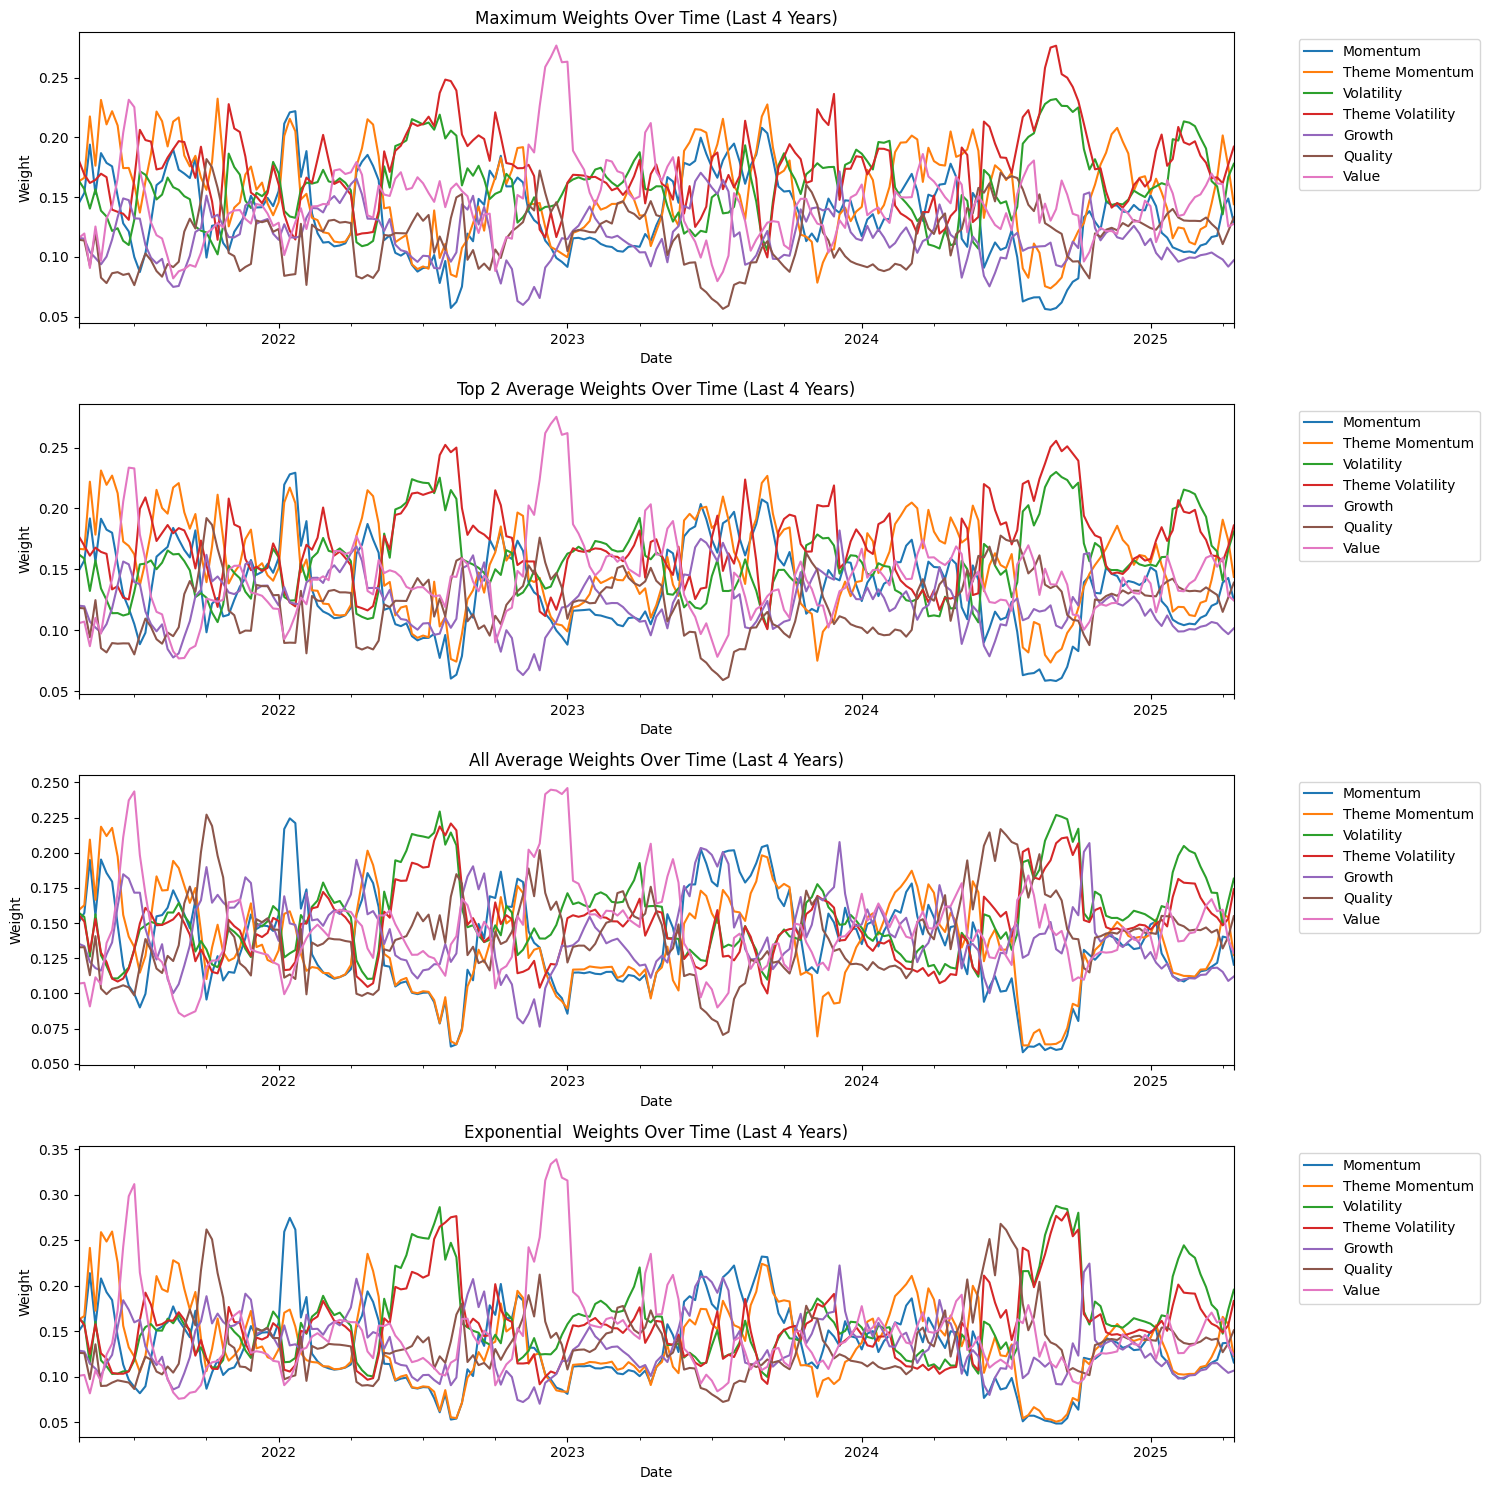

In [10]:
last_date = max_weights.index.max()
start_date = last_date - pd.DateOffset(years=4)

# Filter data for last 4 years
max_weights_4y = max_weights[max_weights.index >= start_date]
top2_weights_4y = top2_weights[top2_weights.index >= start_date]
all_weights_4y = all_weights[all_weights.index >= start_date]
exp_weights_4y = exp_weights[exp_weights.index >= start_date]

# Resample to weekly
max_weights_weekly = max_weights_4y.resample('W').median()
top2_weights_weekly = top2_weights_4y.resample('W').median()
all_weights_weekly = all_weights_4y.resample('W').median()
exp_weights_weekly = exp_weights_4y.resample('W').median()

# # Save resampled weights to Excel
# excel_filename = 'group_weights_weekly_4years.xlsx'
# with pd.ExcelWriter(excel_filename) as writer:
#     max_weights_weekly.to_excel(writer, sheet_name='Max_Weights_Weekly')
#     top2_weights_weekly.to_excel(writer, sheet_name='Top2_Weights_Weekly')
#     all_weights_weekly.to_excel(writer, sheet_name='All_Weights_Weekly')

# print(f"Weekly weight DataFrames for last 4 years have been saved to {excel_filename}")

# Plot using matplotlib
import matplotlib.pyplot as plt

# Create figure with 3 subplots
fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(4, 1, figsize=(15, 15))

# Plot maximum weights
max_weights_weekly.plot(ax=ax1, title='Maximum Weights Over Time (Last 4 Years)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_ylabel('Weight')

# Plot top 2 average weights
top2_weights_weekly.plot(ax=ax2, title='Top 2 Average Weights Over Time (Last 4 Years)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_ylabel('Weight')

# Plot all average weights
all_weights_weekly.plot(ax=ax3, title='All Average Weights Over Time (Last 4 Years)')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.set_ylabel('Weight')

# Plot all average weights
exp_weights_weekly.plot(ax=ax4, title='Exponential  Weights Over Time (Last 4 Years)')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.set_ylabel('Weight')


plt.tight_layout()
plt.show()

In [77]:
# Create Excel writer object
excel_filename = 'IndividualWeight4class.xlsx'
with pd.ExcelWriter(excel_filename) as writer:
    # Save each weights DataFrame to a different sheet
    max_weights.to_excel(writer, sheet_name='Max_Weights')
    top2_weights.to_excel(writer, sheet_name='Top2_Weights')
    all_weights.to_excel(writer, sheet_name='All_Weights')
    # exp_weights.to_excel(writer, sheet_name = 'exp_weights')

print(f"Weight DataFrames have been saved to {excel_filename}")

Weight DataFrames have been saved to IndividualWeight4class.xlsx


In [11]:
max_weights

,Momentum,Theme Momentum,Volatility,Theme Volatility,Growth,Quality,Value
Date,,,,,,,
2006-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-04-09,0.152732,0.173502,0.157036,0.157304,0.099402,0.125871,0.134153
2025-04-11,0.138354,0.154537,0.172447,0.190747,0.093116,0.125807,0.124992
2025-04-15,0.127876,0.144131,0.177892,0.192214,0.097166,0.133074,0.127647


In [12]:
import pandas as pd

# Assuming all_weights is your DataFrame

# Step 1: Basic describe summary
summary = all_weights.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T

# Step 2: Rename columns for clarity (optional)
summary = summary.rename(columns={
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '5%': '5th %ile',
    '25%': '25th %ile',
    '50%': 'Median',
    '75%': '75th %ile',
    '95%': '95th %ile',
    'max': 'Max'
})

# Step 3: Print summary
summary

,count,Mean,Std Dev,Min,5th %ile,25th %ile,Median,75th %ile,95th %ile,Max
Momentum,4655.0,0.140831,0.032697,0.057466,0.093773,0.115778,0.137129,0.164852,0.197473,0.246954
Theme Momentum,4655.0,0.138994,0.031781,0.057882,0.093517,0.116695,0.134567,0.161031,0.193697,0.254719
Volatility,4655.0,0.159400,0.027148,0.101028,0.117580,0.138583,0.156901,0.180342,0.204609,0.235854
Theme Volatility,4655.0,0.153421,0.026182,0.091193,0.113136,0.135572,0.152029,0.170277,0.200220,0.238986
Growth,4655.0,0.132289,0.029958,0.063045,0.089860,0.110986,0.127607,0.149553,0.190720,0.233057
Quality,4655.0,0.141596,0.032074,0.066576,0.095484,0.117552,0.139912,0.160270,0.203159,0.275198
Value,4655.0,0.133470,0.036866,0.056016,0.076859,0.108360,0.128308,0.156631,0.201719,0.261104


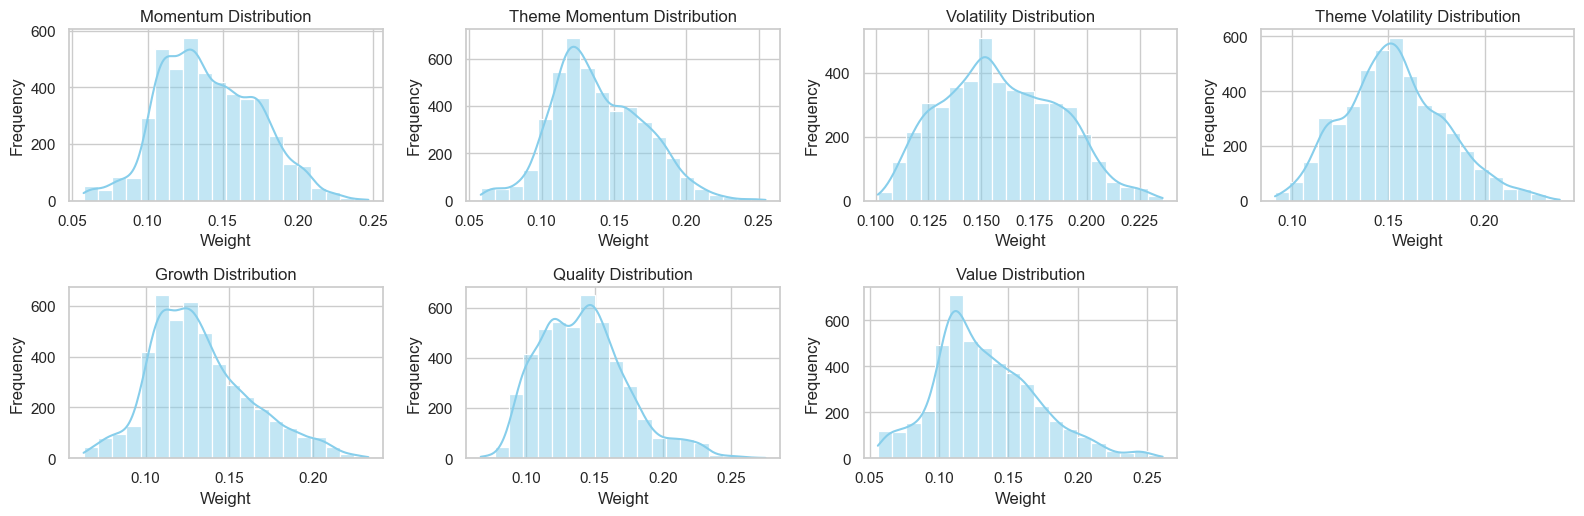

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure seaborn style is set
sns.set(style="whitegrid")

# Number of columns
columns = all_weights.columns

# Create individual plots for each weight
plt.figure(figsize=(16, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)  # 2x2 grid (adjust if more columns)
    sns.histplot(all_weights[col], kde=True, bins=20, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# def adjust_weights_by_downside_volatility(df):
#     # Calculate returns
#     returns = df.pct_change()
    
#     # Create a mask for negative returns only
#     negative_returns = returns.where(returns < 0, 0)
    
#     # Calculate 1-year (252 trading days) downside volatility, annualized
#     # Using sqrt(sum of squares / n) for negative returns only
#     rolling_squares = negative_returns.pow(2).rolling(window=252).sum()
#     rolling_count = negative_returns.rolling(window=42).count()
#     down_vol = np.sqrt(rolling_squares / rolling_count) * np.sqrt(252)
    
#     # Calculate inverse downside volatility weights
#     inv_down_vol = 1 / down_vol
    
#     # Normalize weights to sum to 1
#     normalized_weights = inv_down_vol.div(inv_down_vol.sum(axis=1), axis=0)
    
#     # Forward fill any NaN values from the initial rolling window
#     normalized_weights = normalized_weights.fillna(method='ffill')
    
#     return normalized_weights

# # Assuming your DataFrame is called 'all_weights'
# adjusted_downside_weights = adjust_weights_by_downside_volatility(all_weights)
# adjusted_downside_weights = adjusted_downside_weights.sort_values(by='Date')

In [ ]:
# def adjust_weights_by_downside_volatility_softmax(df, lambda_param=1.0):
#     # Calculate returns
#     returns = df.pct_change()
    
#     # Create a mask for negative returns only
#     negative_returns = returns.where(returns < 0, 0)
    
#     # Calculate 2-month (42 trading days) downside volatility, annualized
#     # Using sqrt(sum of squares / n) for negative returns only
#     rolling_squares = negative_returns.pow(2).rolling(window=42).sum()
#     rolling_count = negative_returns.rolling(window=252).count()
#     down_vol = np.sqrt(rolling_squares / rolling_count) * np.sqrt(252)
    
#     # Apply softmax transformation
#     # We use negative downside volatility so lower volatility gets higher weight
#     exp_neg_vol = np.exp(-lambda_param * down_vol)
    
#     # Normalize weights to sum to 1
#     softmax_weights = exp_neg_vol.div(exp_neg_vol.sum(axis=1), axis=0)
    
#     # Forward fill any NaN values from the initial rolling window
#     softmax_weights = softmax_weights.fillna(method='ffill')
    
#     return softmax_weights

# # Assuming your DataFrame is called 'all_weights'
# adjusted_downside_weights = adjust_weights_by_downside_volatility_softmax(all_weights)

In [17]:
# def softmax_weights(df, lambda_param=1.0):
#     # Apply softmax transformation directly to the values
#     exp_values = np.exp(lambda_param * df)
    
#     # Normalize weights to sum to 1
#     softmax_weights = exp_values.div(exp_values.sum(axis=1), axis=0)
    
#     return softmax_weights

# # Assuming your DataFrame is called 'df'
# adjusted_weights = softmax_weights(all_weights)
# # # Assuming your DataFrame is called 'all_weights'
# adjusted_weights = adjusted_weights.sort_values(by='Date')
# adjusted_weights

In [18]:
# def enhance_zscore_weights(df, enhancement_factor=1.5, threshold=1.0, scaling_exponent=2, position_limit=0.33):
#     """
#     Gradually amplifies existing weights based on their deviation from the expanding mean.
#     Uses column-specific expanding statistics with smooth scaling instead of a hard threshold.

#     Parameters:
#     - df: DataFrame of weights
#     - enhancement_factor: Maximum enhancement multiplier for extreme deviations
#     - threshold: Z-score level at which enhancement starts
#     - scaling_exponent: Controls the smoothness of enhancement (higher = more aggressive)
#     - position_limit: Maximum absolute weight per position (to prevent concentration risk)

#     Returns:
#     - normalized_weights: DataFrame with enhanced weights
#     - weight_deviation: DataFrame of z-score deviations
#     """
#     # Calculate expanding statistics for each column
#     expanding_mean = df.expanding().mean()
#     expanding_std = df.expanding().std()
    
#     # Compute z-score deviation
#     weight_deviation = (df - expanding_mean) / expanding_std
    
#     # Smooth enhancement factor (gradual scaling)
#     enhancement = 1 + (enhancement_factor - 1) * np.tanh((abs(weight_deviation) - threshold) * scaling_exponent)
#     enhancement[abs(weight_deviation) <= threshold] = 1  # No enhancement below threshold
    
#     # Apply enhancement while preserving sign
#     enhanced_weights = df * enhancement
    
#     # Normalize weights to sum to 1
#     normalized_weights = enhanced_weights.div(enhanced_weights.sum(axis=1), axis=0)
    
#     # Apply position limits
#     normalized_weights = normalized_weights.clip(-position_limit, position_limit)

#     return normalized_weights, weight_deviation

# # Example usage
# enhanced_weights, deviations = enhance_zscore_weights(
#     all_weights,
#     enhancement_factor=1.5,  # Max 50% increase
#     threshold=1.0,  # Start enhancing beyond 1 std deviation
#     scaling_exponent=2,  # Controls smoothness
#     position_limit=0.33  # Cap weight magnitude at 20%
# )

In [49]:
# Convert all columns to numeric, forcing errors to NaN
df_avg_zscores = df_avg_zscores.apply(pd.to_numeric, errors='coerce')

# Create an empty list to store results
top_factors = []

# Iterate through each row (date)
for date, row in df_avg_zscores.iterrows():
    top_5 = row.nlargest(min(6, row.count()))  # Get top 5 (or fewer if not available)
    
    factor_names = top_5.index.tolist()
    factor_values = top_5.values.tolist()
    
    # Construct a dictionary with Date and available factors
    entry = {'Date': date}
    for i in range(len(factor_names)):  # Iterate only up to available values
        entry[f'Factor_{i+1}'] = factor_names[i]
        entry[f'ZScore_{i+1}'] = factor_values[i]
    
    top_factors.append(entry)

# Convert to DataFrame
top_factors_df = pd.DataFrame(top_factors)

# Display result
print(top_factors_df.head())


        Date        Factor_1  ZScore_1            Factor_2  ZScore_2  \
0 2006-06-21             NaN       NaN                 NaN       NaN   
1 2006-06-22  QualityQuarter  3.145743  SectorGrowthConsol  2.831570   
2 2006-06-23        HighBeta  2.936471         ThemeLongAM  2.649098   
3 2006-06-26    ThemeLowBeta  3.224334        ThemeDownVol  3.045466   
4 2006-06-27    ThemeLowBeta  3.066177        ThemeDownVol  2.426358   

         Factor_3  ZScore_3       Factor_4  ZScore_4          Factor_5  \
0             NaN       NaN            NaN       NaN               NaN   
1    LongSectorAM  2.642840  ThemeValueABS  2.612073  SectorValuePrice   
2  SectorValueABS  2.628043  ThemeHighBeta  2.497135    SectorHighBeta   
3     ThemeAvgVol  2.680807        LowBeta  2.501285       ThemeLowVol   
4  SectorValueABS  2.406837    ThemeLowVol  2.356189       ThemeAvgVol   

   ZScore_5         Factor_6  ZScore_6  
0       NaN              NaN       NaN  
1  2.276894  ThemeValuePrice  2.008928  

In [50]:
top_factors_df = top_factors_df.sort_values(by='Date')
top_factors_df

,Date,Factor_1,ZScore_1,Factor_2,ZScore_2,Factor_3,ZScore_3,Factor_4,ZScore_4,Factor_5,ZScore_5,Factor_6,ZScore_6
4613,2006-01-06,Value_ABS,2.130673,DownVol,1.594448,LowBeta,1.550549,LowVol,1.529595,AvgVol,1.528429,ThemeDownVol,1.519430
4627,2006-01-09,Value_ABS,2.207693,ThemeDownVol,1.614776,DownVol,1.606312,SectorDownVol,1.567870,LowVol,1.562565,SectorLowBeta,1.539012
4633,2006-01-12,Value_ABS,2.248266,LowVol,1.615520,SectorDownVol,1.604771,ThemeDownVol,1.589182,DownVol,1.574136,SectorLowVol,1.503990
4614,2006-02-06,Value_ABS,2.134216,DownVol,1.591091,LowBeta,1.550383,AvgVol,1.526804,LowVol,1.526722,ThemeDownVol,1.514188
4625,2006-02-08,Value_ABS,2.217737,ThemeDownVol,1.642584,DownVol,1.613641,LowVol,1.576846,SectorDownVol,1.534773,SectorLowBeta,1.501569
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,2025-01-21,Value_ABS,2.467799,MidSectorAM,2.348726,QualityQuarterConsol,1.666255,QualityQuarter,1.536582,LowVol,1.488604,SectorValueYield,1.461454
4588,2025-01-22,Value_ABS,2.429987,MidSectorAM,2.107336,QualityQuarterConsol,1.825489,LowVol,1.658020,QualityQuarter,1.612739,SectorLowVol,1.585397
4589,2025-01-23,MidSectorAM,2.962069,Value_ABS,2.077204,QualityQuarterConsol,1.886098,SectorLowVol,1.880841,LowVol,1.757480,QualityQuarter,1.666623
4590,2025-01-24,MidSectorAM,2.550761,Value_ABS,2.035032,SectorLowVol,1.945263,QualityQuarterConsol,1.932087,LowVol,1.824130,AvgVol,1.659774


In [51]:
def calculate_simple_weights(df):
    # Calculate sum of all ZScore columns
    zscore_sum = df[[f'ZScore_{i}' for i in range(1, 7)]].sum(axis=1)
    
    # Calculate weights and keep corresponding factors
    result_df = pd.DataFrame({
        'Date': df['Date']
    })
    
    # Add weight and factor columns
    for i in range(1, 6):
        result_df[f'Weight_{i}'] = df[f'ZScore_{i}'] / zscore_sum
        result_df[f'Factor_{i}'] = df[f'Factor_{i}']
    
    return result_df

# Calculate weights
weights_df = calculate_simple_weights(top_factors_df)

In [53]:
weights_df.to_csv('TOP6.csv')


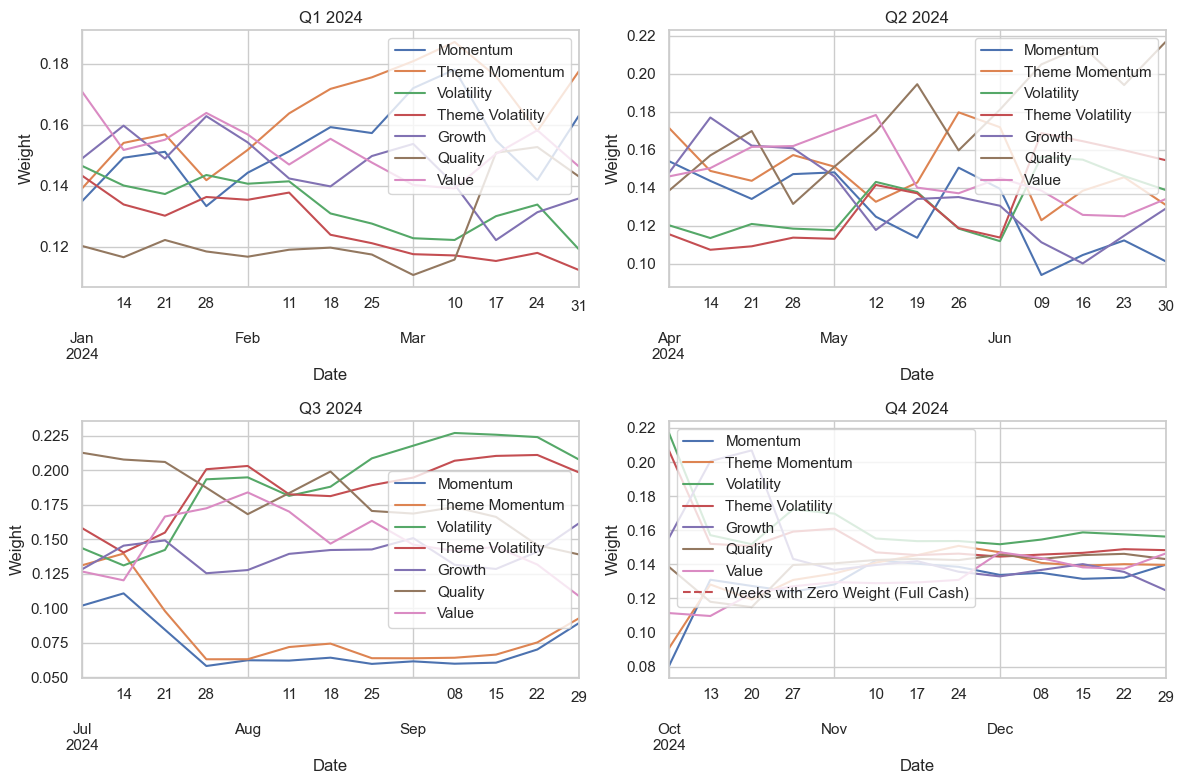

In [14]:
# # First, check which column name is used for Nifty
# nifty_column = 'Nifty500'
# if 'Nifty 500' in df_avg_zscores.columns:
#     nifty_column = 'Nifty 500'

# # Get all dates where Nifty z-score is NaN
# nan_nifty_dates = df_avg_zscores[df_avg_zscores[nifty_column].isna()].index

# # Print the number of dates with NaN Nifty values
# print(f"Total dates with NaN Nifty z-score: {len(nan_nifty_dates)}")

# # Print the first few dates with NaN values if any exist
# if len(nan_nifty_dates) > 0:
#     print("\nFirst 10 dates with NaN Nifty z-score:")
#     for date in nan_nifty_dates[:10]:
#         print(f"  {date}")
    
#     # Optional: Save these dates to a file
#     pd.Series(nan_nifty_dates).to_csv("nan_nifty_dates.csv", index=False, header=['Date'])
# else:
#     print("No dates found with NaN Nifty z-score.")

# # Optional: Check what percentage of your dataset has NaN Nifty values
# total_dates = len(df_avg_zscores)
# nan_percentage = (len(nan_nifty_dates) / total_dates) * 100
# print(f"\nPercentage of dates with NaN Nifty z-score: {nan_percentage:.2f}%")

# # To get a better understanding, check the date range of NaN values
# if len(nan_nifty_dates) > 0:
#     first_nan_date = min(nan_nifty_dates)
#     last_nan_date = max(nan_nifty_dates)
#     print(f"\nDate range of NaN values: {first_nan_date} to {last_nan_date}")


# Define last date and filter for last 2 years
last_date = all_weights.index.max()
start_date = last_date - pd.DateOffset(years=2)
all_weights_4y = all_weights[all_weights.index >= start_date]

# Resample to weekly
all_weights_weekly = all_weights_4y.resample('W').median()

# Filter for CY 2024
all_weights_2024 = all_weights_weekly[all_weights_weekly.index.year == 2024]

# Identify zero-weight weeks
zero_days = all_weights_2024[(all_weights_2024 == 0).all(axis=1)].index

# Split data into four quarters
quarters = {
    "Q1 2024": all_weights_2024.loc["2024-01-01":"2024-03-31"],
    "Q2 2024": all_weights_2024.loc["2024-04-01":"2024-06-30"],
    "Q3 2024": all_weights_2024.loc["2024-07-01":"2024-09-30"],
    "Q4 2024": all_weights_2024.loc["2024-10-01":"2024-12-31"],
}

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten to make indexing easier

for i, (quarter, df) in enumerate(quarters.items()):
    ax = axes[i]
    
    # Plot weights
    df.plot(ax=ax, title=quarter)

    # Add vertical red dotted lines for zero-weight weeks
    for day in zero_days:
        if day in df.index:
            ax.axvline(day, color='red', linestyle='--', alpha=0.6)

    ax.set_ylabel('Weight')

# Add a single legend for cash weeks in the last subplot
axes[3].plot([], [], 'r--', label="Weeks with Zero Weight (Full Cash)")
axes[3].legend(loc='upper left')

plt.tight_layout()
plt.show()